In [1]:
import climt
import pickle
from sympl import PlotFunctionMonitor
from matplotlib import pyplot as plt
import numpy as np
from xarray import DataArray

%matplotlib inline

In [2]:
with open('./east.pickle', 'rb') as f:
    east = pickle.load(f)
    
with open('./north.pickle', 'rb') as f:
    north = pickle.load(f)

In [3]:
def plot_state(state):
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    
    ax = fig.add_subplot(1,3,1)
    quiver(ax, state)
    ax.set_title('wind')
    
    ax = fig.add_subplot(1,3,2)
    state['gfs_tracers'][dict(mid_levels=0, tracer_number=4)].transpose().plot.contourf(
        ax=ax, levels=16)
    ax.set_title('tracer')
    
    ax = fig.add_subplot(1,3,3)
    state['air_pressure'][dict(mid_levels=0)].transpose().plot.contourf(
        ax=ax, levels=16)
    ax.set_title('pressure')
    
    fig.tight_layout()
    plt.show()

In [4]:
def quiver(ax, state):
    x,y = np.meshgrid(state['x'], state['y'])
    Q = plt.quiver(x[::4], y[::4], state['eastward_wind'][{"mid_levels":0}].transpose()[::4], state['northward_wind'][{"mid_levels":0}].transpose()[::4], 
                   scale=800)

In [5]:
dycore = climt.GfsDynamicalCore(number_of_longitudes=198,
                                number_of_latitudes=198,
                                dry_pressure=1e5,
                                number_of_damped_levels=5,
                                number_of_tracers=1)

Initialising dynamical core, this could take some time...
Done!


In [6]:
my_state = climt.get_default_state([dycore], x=dycore.grid_definition['x'],
                                   y=dycore.grid_definition['y'],
                                   mid_levels=dycore.grid_definition['mid_levels'],
                                   interface_levels=dycore.grid_definition['interface_levels'])

In [7]:
t = my_state['gfs_tracers'][dict(tracer_number=4, mid_levels=0)]
t[(t['longitude']>215) & (t['longitude']<235), (t['latitude']>20) & (t['latitude']<35)] = 1e-2

my_state['northward_wind'].values[:] = north
my_state['eastward_wind'].values[:] = east

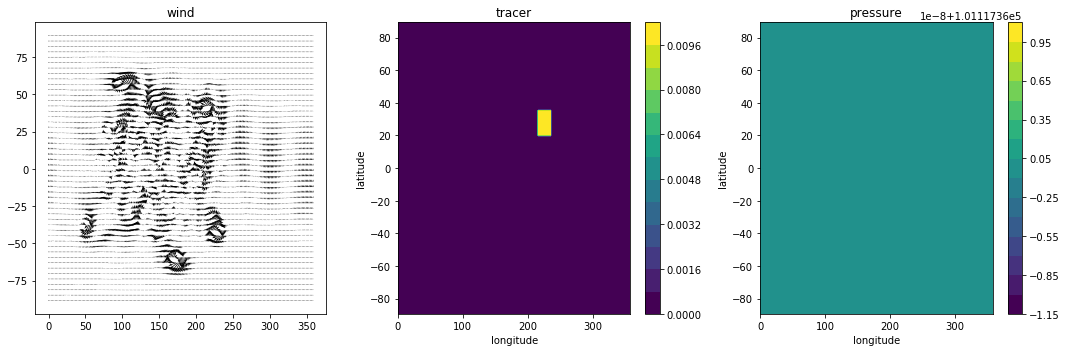

In [8]:
plot_state(my_state)

State modified, setting spectral arrays


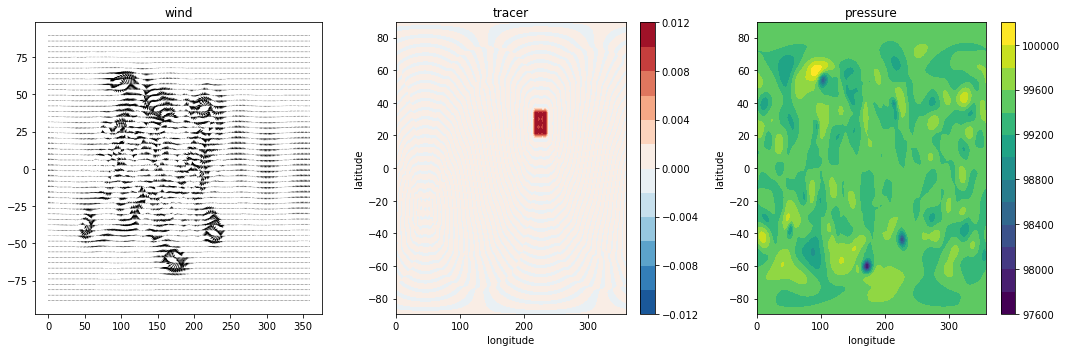

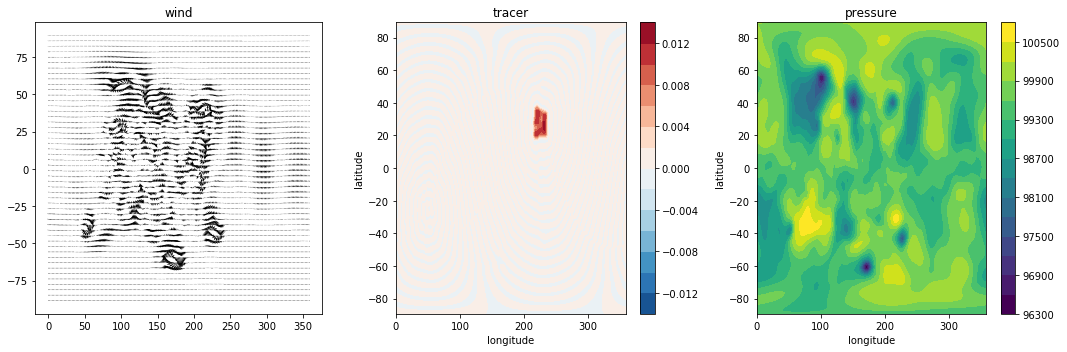

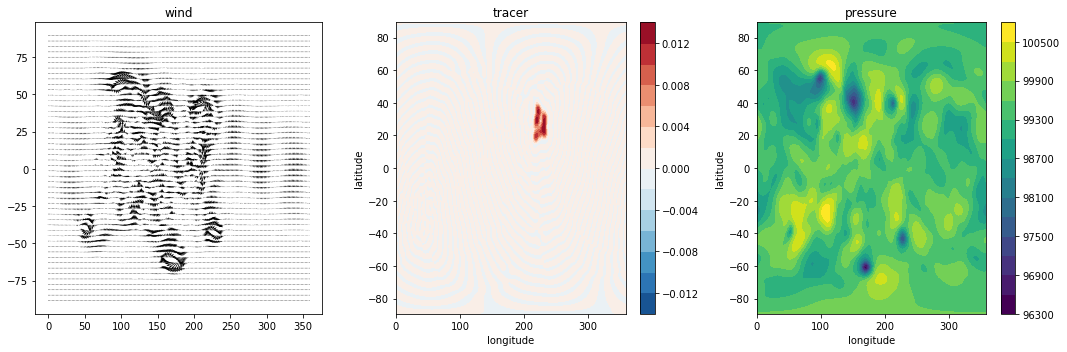

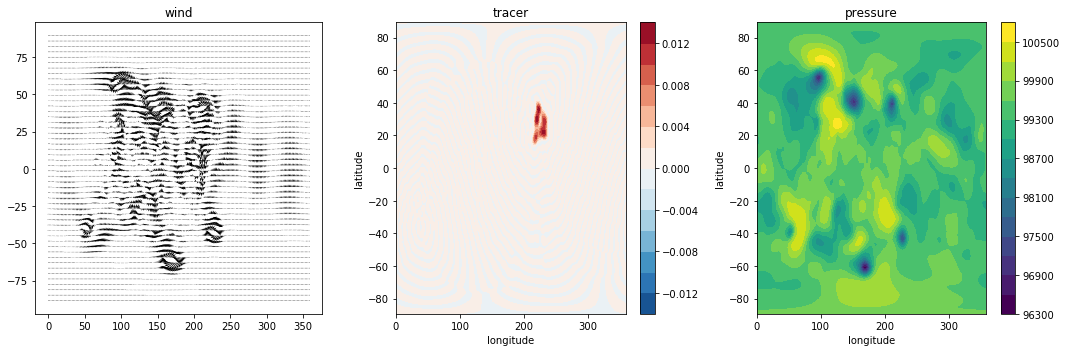

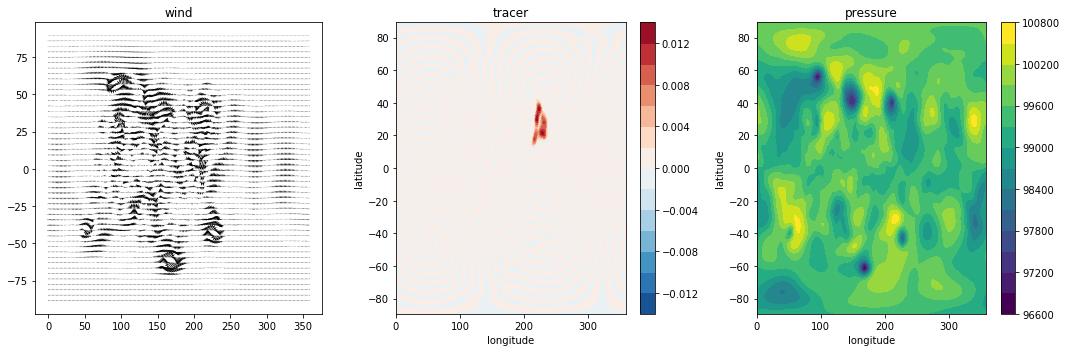

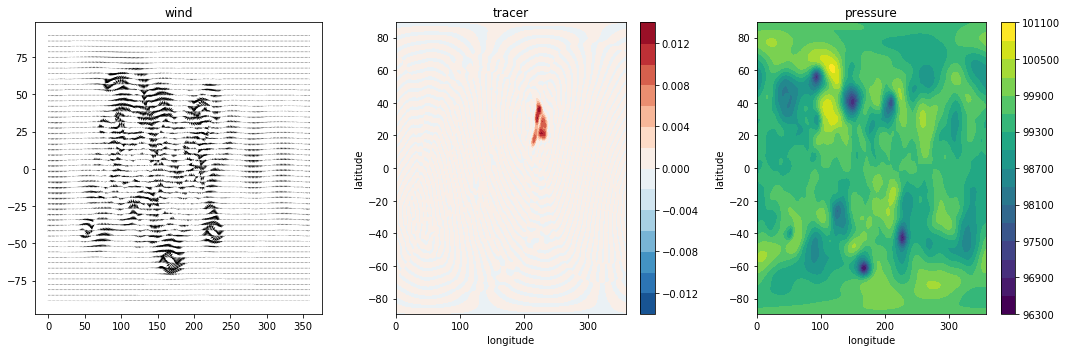

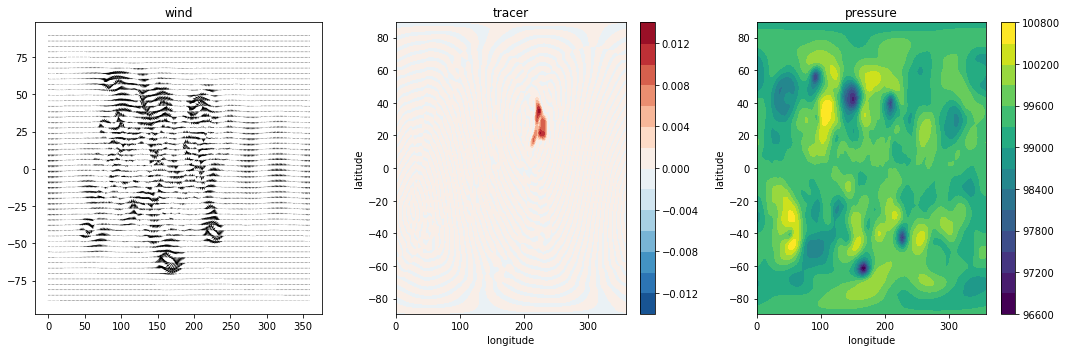

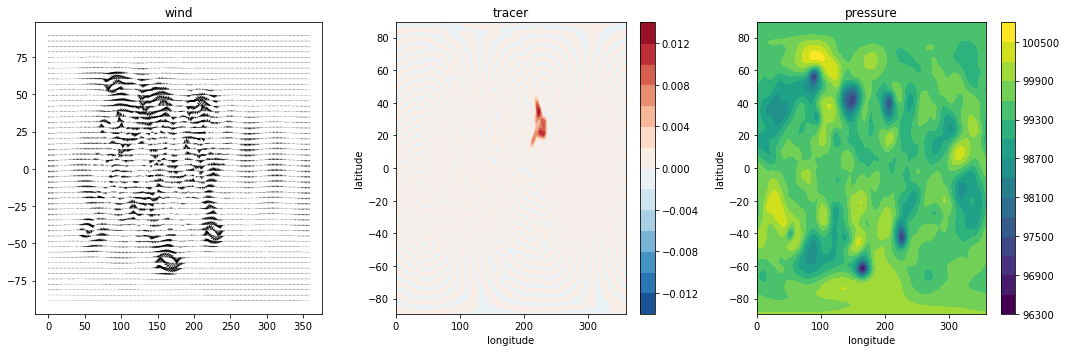

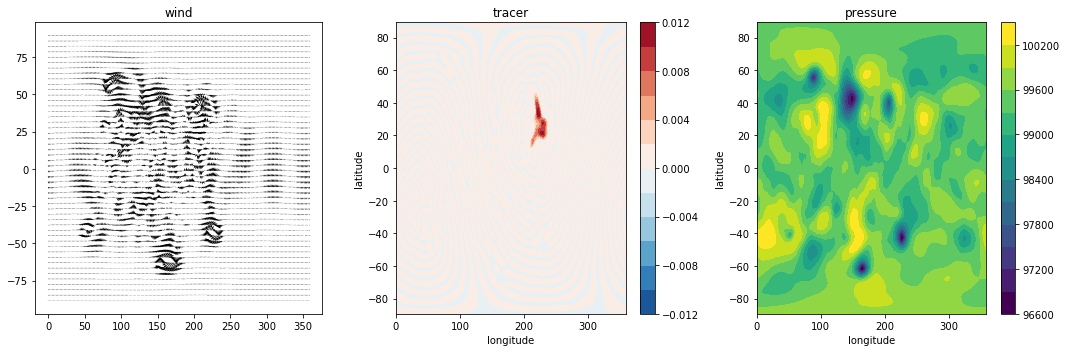

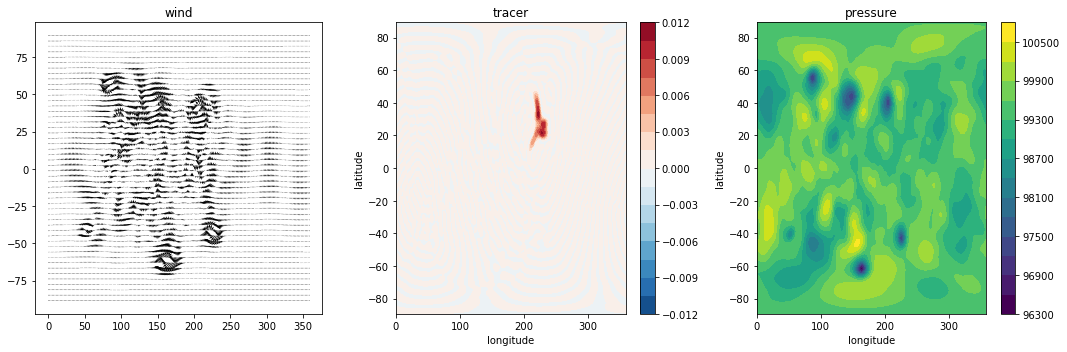

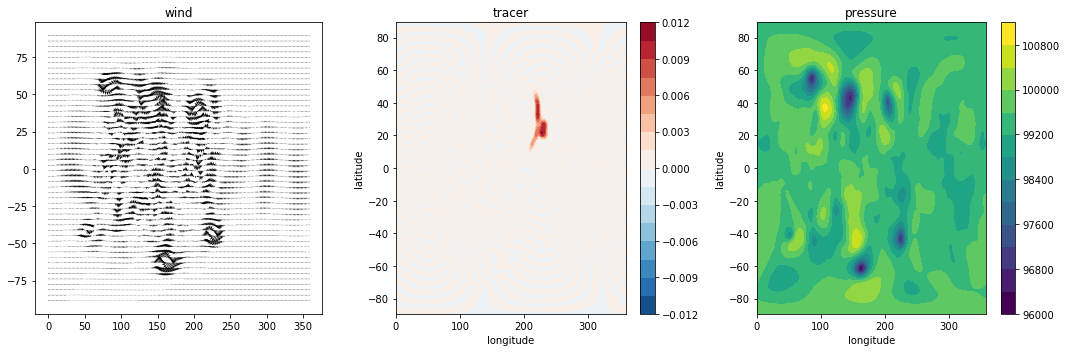

In [9]:
for i in range(101):
    output, diag = dycore(my_state)
    my_state.update(output)
    my_state.update(diag)
    if i%10 == 0:
        plot_state(my_state)